In [1]:
import numpy as np

def criaDatasetBidimensionalBinário(n=20):
    """
    Cria um dataset bidimensional binário com
    rótulos igual 1 para todo exemplo que tiver
    o valor da primeira característica maior do
    que a da segunda, e -1 para os demais.
    """
    X = np.random.uniform(size=(n,2))
    y = np.array(X[:,0]>X[:,1], dtype=int)*2-1
    return X, y

X, y = criaDatasetBidimensionalBinário()


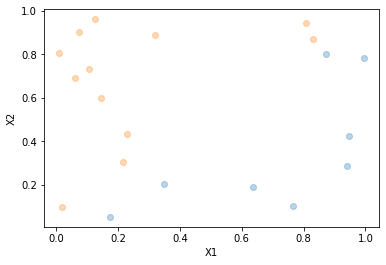

In [2]:
import matplotlib.pyplot as plt

def plotaDatasetBidimensional(X, y):
    """
    Plota um dataset bidimensional.
    """
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

plotaDatasetBidimensional(X, y)

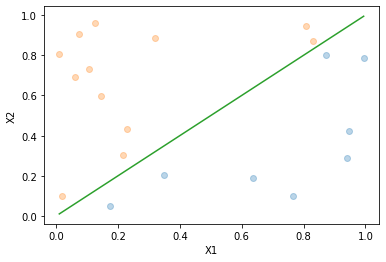

In [3]:
def plotaHiperplanoDatasetBidimensional(X, y, vetor, intercept=0):
    """
    Plota um dataset bidimensional com um hiperplano definido por um
    vetor e o valor em que este vetor intercepta o eixo horizontal.
    """
    x0min = min(X[:,0])
    x0max = max(X[:,0])
    xs = np.linspace(x0min, x0max, num=2)
    ys = (-vetor[0] / vetor[1]) * xs - intercept / vetor[1]
    plotaDatasetBidimensional(X, y)
    plt.plot(xs,ys)

plotaHiperplanoDatasetBidimensional(X, y, [1,-1])

In [15]:
from sklearn.base import BaseEstimator, ClassifierMixin
import random

def signal(a):
    return (a >= 0) * 2 - 1

class Perceptron(BaseEstimator, ClassifierMixin):
    """
    Primeira versão do Perceptron treinado pelo
    Perceptron Learning Algorithm (PLA).
    """
    def __init__(self):
        self.w = None
        self.activation = signal

    def fit(self, X, y):
        self.w = np.random.uniform(-1, 1, size=X.shape[1])
        indexes = list(range(X.shape[0]))
        while True:
            any_error = False
            for i in sorted(indexes, key=lambda k: random.random()):
                x = X[i,:]
                ypred = self.predict(x)
                erro = y[i] - ypred
                if erro != 0:
                    any_error = True
                self.w += erro * x
            if not any_error:
                break

    def predict(self, X):
        a = np.matmul(X, self.w)
        ypred = self.activation(a)
        return ypred

perceptron = Perceptron()
perceptron.fit(X, y)
ypred = perceptron.predict(X)
sum(y == ypred)/len(y)

1.0

In [28]:
from sklearn.base import BaseEstimator, ClassifierMixin
import random

def signal(a):
    return (a >= 0) * 2 - 1

class Perceptron(BaseEstimator, ClassifierMixin):
    """
    Versão do Perceptron com limite de iterações,
    treinado pelo Perceptron Learning Algorithm (PLA).
    """
    def __init__(self, max_iter=100):
        self.w = None
        self.activation = signal
        self.max_iter = max_iter

    def fit(self, X, y):
        self.w = np.random.uniform(-1, 1, size=X.shape[1])
        indexes = list(range(X.shape[0]))
        for _ in range(self.max_iter):
            any_error = False
            for i in sorted(indexes, key=lambda k: random.random()):
                x = X[i,:]
                ypred = self.predict(x)
                erro = y[i] - ypred
                if erro != 0:
                    any_error = True
                self.w += erro * x
            if not any_error:
                break

    def predict(self, X):
        a = np.matmul(X, self.w)
        ypred = self.activation(a)
        return ypred

perceptron = Perceptron()
perceptron.fit(X, y)
ypred = perceptron.predict(X)
sum(y == ypred)/len(y)

1.0